# Bill Policy Areas and Geographic Regions: Is there a Correlation? 
##### By Noah Woosley, Noah Rand, Mark Belanger
##### March 31, 2023

### Research Question: Do senators from states in different geographical regions favor the proposition of certain bill policy areas over others?
The United States is a large country from many standpoints, including land area, population, economic output, and more. Being so large means that some regions of the country have different needs and interests than others. These needs and interests can carry over to Congress.

When a Senator proposes a bill, it has to be designated within one of thirty-two policy areas. These policy areas label the overall topic of the bill being proposed. These policy areas range agriculture to water to immigration to energy and more. When proposing policy in Congress, Senators from some states might favor proposing bills of certain policy areas more than others because of the aforementioned differences in regions. For example, Senators from Midwestern states may favor agricultural bills, due to their large farming industry, while Senators from Western states may favor water bills due to the droughts they experience.

This project attempts to study if there is a noticeable correlation between geographic region and the most common bill policy area from Senators of each state. Please run the following two code cells to ensure that the notebook is up to date and the proper libraries are imported.


In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import json
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from get_data import get_data
from api_keys import API_KEY
from data_processing import common_subject, count_subject
from maps import get_map_data, make_geodata, add_map_data

### Methodology

Data about bills proposed in the Senate of the 117th Congress was pulled from the Congress API, api.congress.gov. This is outputted as a dictionary that contains information about 250 of the bills proposed in the Senate during that Congress. The Congress lasted between January 3, 2021, and January 3, 2023. The bill number for each bill is the information that was most important for this step. An API key from the API is required to pull the data.
Once we had a dictionary containing the bill numbers associated with each bill, we iterated through all the bill numbers to get data about each individual bill from the API. The data included many fields, however, the ones we stored were bill number, congress number, sponsor, state, and policy area. The most important data categories we stored were the policy area and state, because we could use them to create plots comparing state and policy areas, helping us find trends within regions. 
To store this data, we used the pandas library to save the data in a dataframe with each row being a bill, and the columns being the aforementioned fields. Once this dataframe was made, it was converted to a csv file using the same formatting for rows and columns as described for the dataframe. Putting this data onto geospatial plots demonstrating the most popular policy area, by color, for each state allows us to visually see trends through groups of states marked with the same color.
This entire process was made into a function with the inputs being the start congress to get data from, the end congress to get data from, and the API key.

Run the code cell below to run the function for the 117th Congress.

In [12]:
get_data(117, 117, API_KEY)
bills = pd.read_csv("bills_data.csv")

### Results and Interpretations:

Now that we have data for the bills in the 117th Congress, let’s take a look at the ten most common policy areas. Run the code cell below to generate a plot for this data.

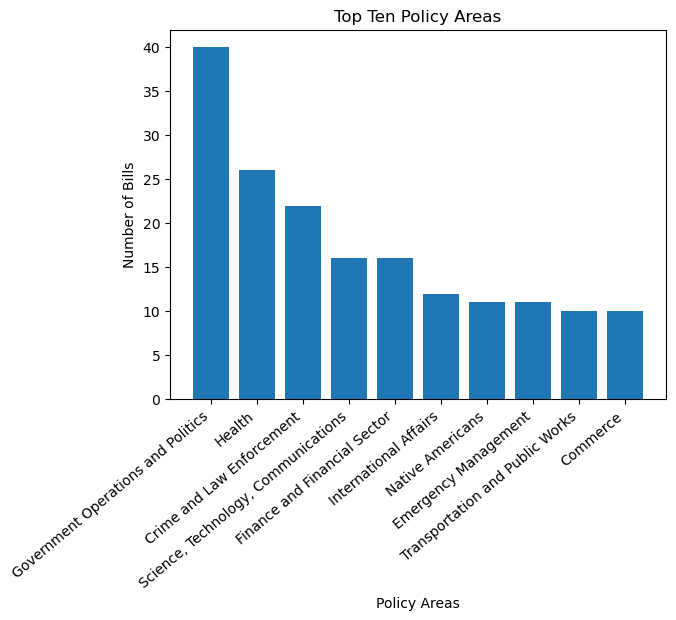

In [13]:
# Bills per Congress plot
bills = pd.read_csv("bills_data.csv")
bills_per_policy_area = bills["Policy Areas"].value_counts()
plt.bar(
    bills_per_policy_area.index.tolist()[0:10],
    bills_per_policy_area.tolist()[0:10],
    tick_label=bills_per_policy_area.index.tolist()[0:10],
)
plt.title("Top Ten Policy Areas")
plt.xlabel("Policy Areas")
plt.ylabel("Number of Bills")
plt.xticks(rotation=40, ha="right")
plt.show()

From this plot, we can see that the most common policy area for the 117th Congress is “Government Operations and Politics,” which is more popular than the second most common policy area, “Health” by about fifteen bills. Knowing this, we should expect to see “Government Operations and Politics” often on the geospatial plot. The large change between “Government Operations and Politics” and “Health” may be due to “Government Operations and Politics” being a large umbrella for policies used that ultimately dictate how popular the other policy areas are. For example, policies within “Health” may be determined based on government operations policies.

Now that we have a visual representation of the ten most popular policy areas, let's look at how many bills are proposed from the Senators of the states. Run the three code cell below to view the geoplot.

In [14]:
# Dictionaries needed for geoplots
states_and_policy_areas = bills[["State", "Policy Areas"]]
state_policy_dict = {}
for state in states_and_policy_areas["State"].tolist():
    state_policy_dict[state] = states_and_policy_areas[
        states_and_policy_areas["State"] == state
    ]["Policy Areas"].tolist()
state_subject_dict = count_subject(state_policy_dict)
most_common_policy_area = common_subject(state_subject_dict)

In [15]:
# Data calculations to make geoplot
map_data_dict = get_map_data()
new_map_data_dict = add_map_data(
    map_data_dict, bills["State"].value_counts().to_dict(), most_common_policy_area
)
map_data_geoframe = make_geodata(new_map_data_dict)

Bill Count by State


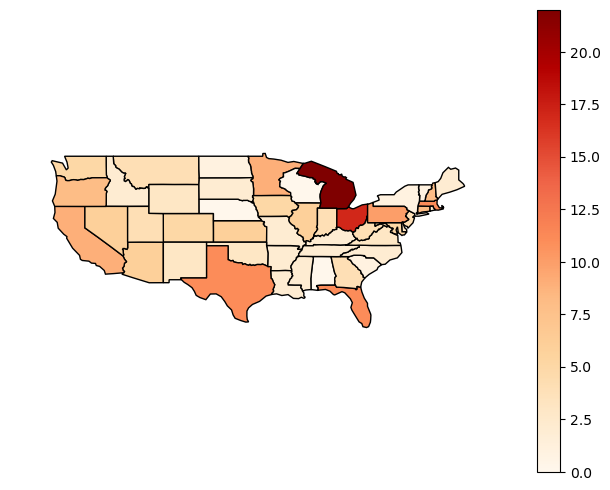

In [16]:
# Bills per State geoplot
gplt.choropleth(
    map_data_geoframe,
    hue="bill count",
    cmap="OrRd",
    legend=True,
)
print("Bill Count by State")

From this geoplot, we can see that the Senators from Michigan and Ohio were the most active in proposing bills during the 117th Congress. Knowing this, and that “Government Operations and Politics” is the most popular policy area, there is a good chance that Michigan and Ohio’s most common policy area will be “Government Operations and Politics.” We can also see that states with high populations, such as Texas, Florida, California, and Massachusetts have relatively large amounts of bills proposed by their Senators. This is likely caused by the fact that the larger populations have more opinions, requests, and influence on their Senators, causing them to propose more bills representing their citizens. However, this is not universally true, as New York has a high population but was not very active in proposing bills. In fact, Senators from Maine proposed more Senate bills than New York, despite Maine having a smaller population.

Now that we have context for policy area popularity and activity of states, let’s look at the information aggregated together and see what policy area is most popular for each state.

Most Common Policy Area by State


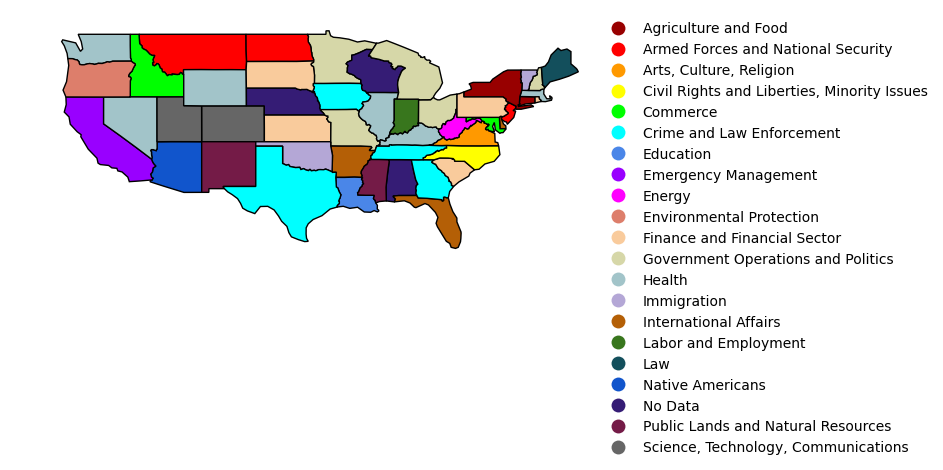

In [17]:
# Most common policy areas per state geoplot
colors = [
    "#980000",
    "#FF0000",
    "#FF9900",
    "#FFFF00",
    "#00FF00",
    "#00FFFF",
    "#4A86E8",
    "#0000FF",
    "#9900FF",
    "#FF00FF",
    "#DD7E6B",
    "#F9CB9C",
    "#D6D7A8",
    "#A2C4C9",
    "#B4A7D6",
    "#D5B6BD",
    "#B45F06",
    "#38761D",
    "#134F5C",
    "#1155CC",
    "#351C75",
    "#741B47",
    "#666666",
]
cmap1 = mpl.colors.ListedColormap(colors, name="new_cmap")
gplt.choropleth(
    map_data_geoframe,
    hue="policy area",
    cmap=cmap1,
    legend=True,
    legend_kwargs={"bbox_to_anchor": (1.5, 1), "frameon": False},
)
print("Most Common Policy Area by State")

This geoplot shows each state’s most proposed policy area of legislation on a color scale. Multiple states of the same color show preference toward a specific policy area. An initial look at this map reveals no large or noticeable groups of colors. However, there are smaller groupings. Midwestern states like Ohio, Michigan, Minnesota, and Missouri all share a common policy area, “Government Operations and Politics,” which was predicted above knowing that Michigan and Ohio were most active in proposing bills. This however, does not align with our initial thinking that Midwestern states would favor bills relating to agriculture. Other small groups of states with similar policies are Montana and North Dakota for “Armed Forces and National Security,” Colorado and Utah for “Science, Technology, Communications,” Kentucky and Illinois for “Health,” Georgia, Tennessee, Iowa and Texas for “Crime and Law Enforcement,” New York and Connecticut for “Agriculture and Food,” Washington, Nevada and Wyoming for “Health,” South Dakota and Kansas for “Finance and Financial Sector.” Some of these results are surprising. For example, New York and Connecticut share a common policy area of “Agriculture and Food,” although neither states are usually thought of as being associated with agriculture. This suggests the importance of not being presumptuous about state issues, interests, and industries. It also demonstrates that Senators may not be proposing legislation based on national interests rather than their states interest. That being said, no conclusive answer as to why this happened can be answered using our data, this is purely speculation. 

There likely are reasons why agriculture and food bills are most popular for New York and Connecticut, they may just be poorly known in the public sphere. Trends with other states, though, do align with what is heard in the public sphere. For example, Armed Forces and National Security bills are most common for Montana and North Dakota. This could be related to the fact that both Montana and North Dakota have many military bases located within their state. But this also does not tell the full story: by looking at the geoplot of the amount of bills from each state, Montana and North Dakota both proposed a small amount of bills, less than five, meaning that it is possible that there were no repeat policy areas, so the alphabetical first of the policy areas was chosen. This trend could be apparent for multiple of the state combinations with the same common policy area.

### Conclusion
Overall, the groupings of states with common policy areas are not very clear as there are not clear regional boundaries between most common policy areas. While there are some adjacent states with similar policy areas, it is generally not a whole region as we hypothesized. In conclusion, there likely is not a strong correlation between geographic region and the most common policy area of a state. Therefore, we cannot conclude that Senators from different geographic regions prioritize certain bill policy areas over others. 
